Libraries used in the following code

This dataset has been provided by Kaggle and can be found in the following link (https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


Loading our data into a DataFrame

In [2]:
raw_data = pd.read_csv("Cancer_Data.csv")
df = pd.DataFrame(raw_data)

Since we have a lot of columns, I'll set options to display all of them and not slice it

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The id and Unnamed: 32 columns are useless for our analysis

In [4]:
df.drop(["id", "Unnamed: 32"], axis = 1, inplace = True)

Total rows and columns in our dataset

In [5]:
df.shape

(569, 31)

All columns names

In [6]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Checking our columns data type and null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Basic statistics for each numerical variable

In [8]:
df.describe()
## Some variables does have an absolute value much higher than others
## It could potentially lead us into an overweight this variable. Therefore, I'll standardize it using Robust method

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
variables = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

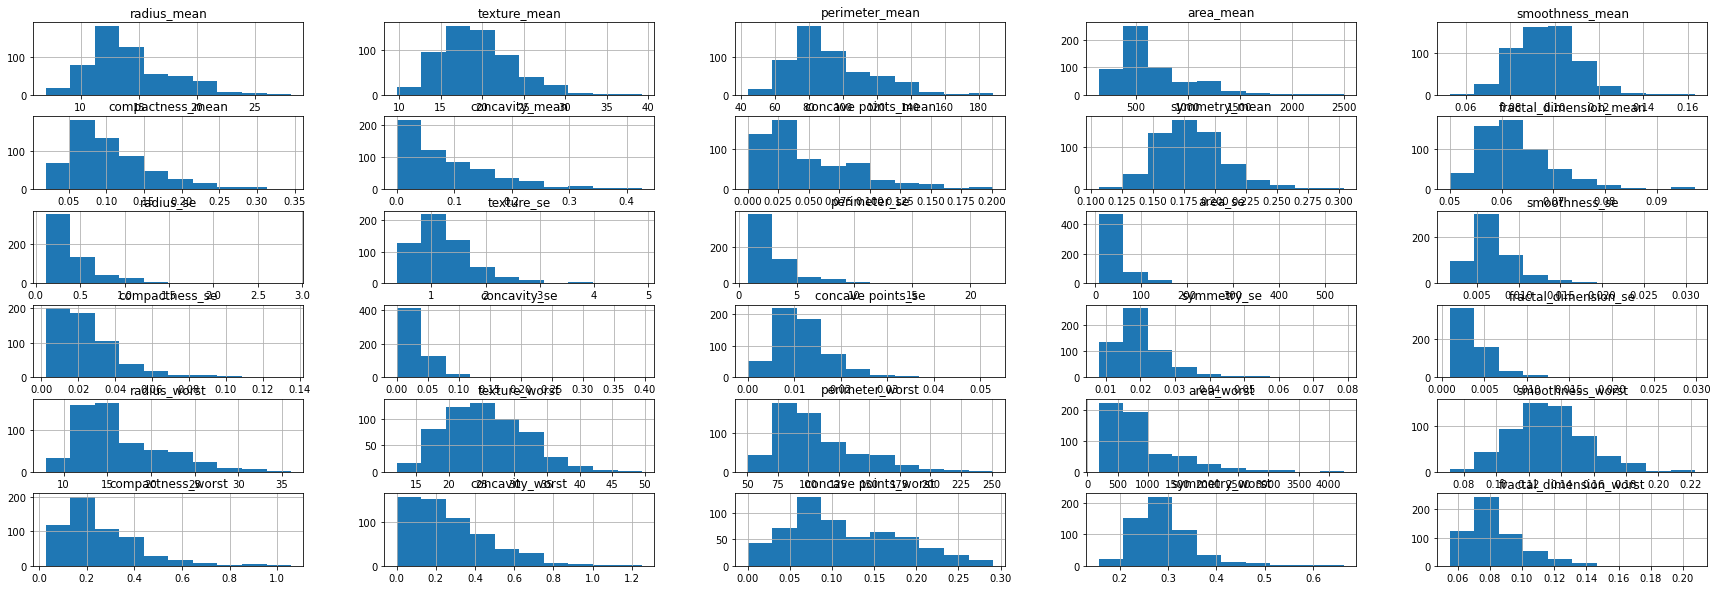

In [10]:
variables.hist(figsize=(30, 10))

Scaling our variables

In [11]:
scale = RobustScaler()
scale.fit(df.drop("diagnosis", axis = 1))

RobustScaler()

In [12]:
new_df = scale.transform(df.drop("diagnosis", axis = 1))
df_parametros = pd.DataFrame(new_df, columns = df.columns[1:])

Values after scalling it

In [13]:
df_parametros.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,3.126978,-0.316669,3.599086,4.713606,0.006382,1.475994,1.032641,0.698529,1.358173,1.301299,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,0.889655,-0.584440,0.634495,1.812363,-0.387974,-0.380485,-0.270401,0.349265,-0.581731,0.149351,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,1.709533,-0.501640,1.312393,2.542063,-0.077259,1.012390,0.461053,1.364536,0.453125,0.599134,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,0.695335,0.074988,0.661336,0.098756,0.917031,2.794528,1.139466,1.094457,4.915865,2.606494,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,1.756592,-0.510389,1.799543,2.557059,1.716493,0.214765,1.149481,1.119910,-0.140625,0.834632,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


Training our model with test size of 25%

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_parametros, df["diagnosis"], test_size = 0.25)

Using only one neighbor at first try. Later, we'll do more values in order to achieve the best results

In [15]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Precision: Accuracy of positive predictions;

Recall: Fraction of positives that were correctly identified;

In [17]:
predict = knn.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           B       0.95      0.97      0.96        87
           M       0.95      0.93      0.94        56

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



With a single neighbor, our model predicted the correct answer 95% precision for both Benign and Malignant cancer;

But I'll try to add more "neighbors" into our model and see if we can get better results
    
    The cell below will calculate the average error when the predicted value is different from the test value

In [18]:
error_accuracy = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predict = knn.predict(X_test)
    error_accuracy.append(np.mean(predict != y_test))

From the graph bellow, our best number for neighbors seems to be 7 for this sample

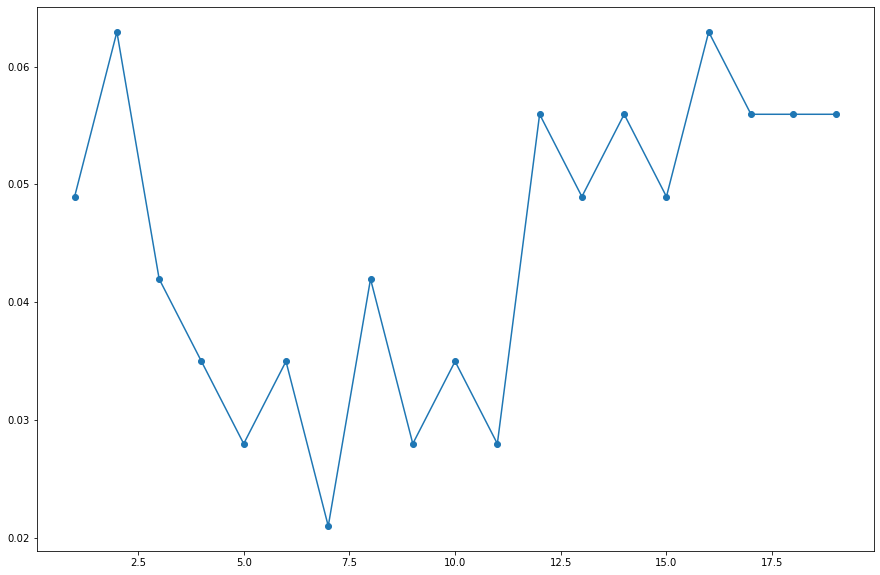

In [20]:
plt.figure(figsize = (15, 10))
plt.plot(range(1, 20), error_accuracy, marker = "o")
plt.show()